In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [12]:
tickers = ['SPY', 'XOM', 'GOOG', 'GLD']
start_date = '2019-01-01'
end_date = '2021-12-10'

In [13]:
def get_data(tickers, start_date, end_date):
    'Read stock data (adjusted close) for the given ticker and date range'
    tickers_df = yf.download(tickers, start=start_date, end=end_date, progress=False)
    return tickers_df

In [121]:
def plot_data(df, title='Stock Prices'):
    plt.rcParams['figure.figsize'] = [15,10]   
    ax = df.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock Price')
    
    plt.show()

In [73]:
def test_run():
    #Read Data
    tickers_df = get_data(tickers, start_date, end_date)
    plot_data(tickers_df['Adj Close'])

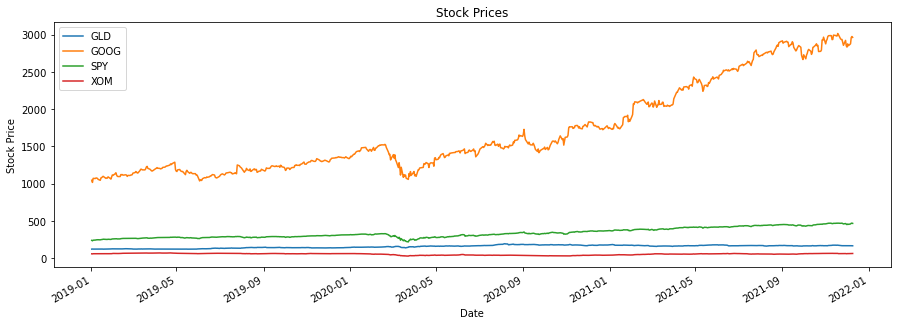

In [74]:
test_run()

#### Analyze the movement of the stock 
normalize the stock by day 1 

In [89]:
def normalize(tickers_df):
    return tickers_df / tickers_df.iloc[0,:]

In [90]:
def test_run():
    #Read Data
    tickers_df = get_data(tickers, start_date, end_date)
    normalize_df = normalize(tickers_df['Adj Close'])
    plot_data(normalize_df)

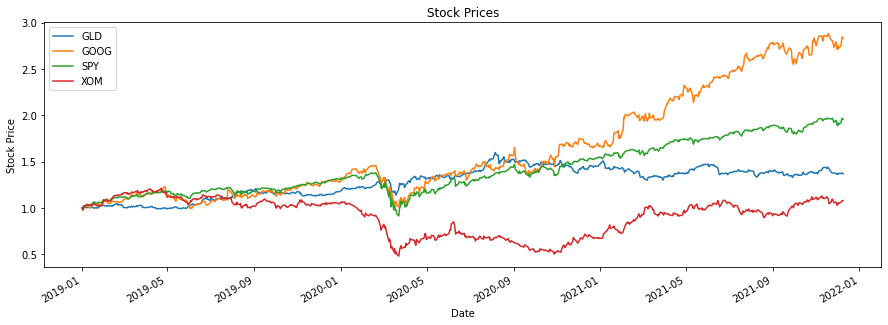

In [91]:
test_run()

In [83]:
tickers_df = get_data(tickers, start_date, end_date)

In [85]:
tickers_df['Adj Close'].head()

,GLD,GOOG,SPY,XOM
Date,,,,
2019-01-02,121.330002,1045.849976,238.694489,58.018696
2019-01-03,122.430000,1016.059998,232.998596,57.127884
2019-01-04,121.440002,1070.709961,240.803101,59.234173
2019-01-07,121.860001,1068.390015,242.701721,59.542206
2019-01-08,121.529999,1076.280029,244.981979,59.975113


In [93]:
tickers_df['Adj Close'].describe()

,GLD,GOOG,SPY,XOM
count,742.000000,742.000000,742.000000,742.000000
mean,155.255984,1702.411637,337.122839,52.974492
std,19.530666,597.723912,65.374544,11.287174
min,119.940002,1016.059998,218.017059,27.830841
25%,139.804996,1215.420013,281.745277,41.043832
50%,162.220001,1465.214966,318.172226,57.296110
75%,170.082497,2095.327393,389.497345,61.364532
max,193.889999,3014.179932,469.730011,70.186623


#### Rolling Mean

In [109]:
spy_df = tickers_df['Adj Close'][['SPY']]

In [111]:
spy_df.head()

,SPY
Date,
2019-01-02,238.694489
2019-01-03,232.998596
2019-01-04,240.803101
2019-01-07,242.701721
2019-01-08,244.981979


In [119]:
spy_df['rolling_mean'] = spy_df['SPY'].rolling(20).mean()
spy_df['std'] = spy_df['SPY'].rolling(20).std()
spy_df['lower_band'] = spy_df['rolling_mean'] - 2 * spy_df['std']
spy_df['upper_band'] = spy_df['rolling_mean'] + 2 * spy_df['std']

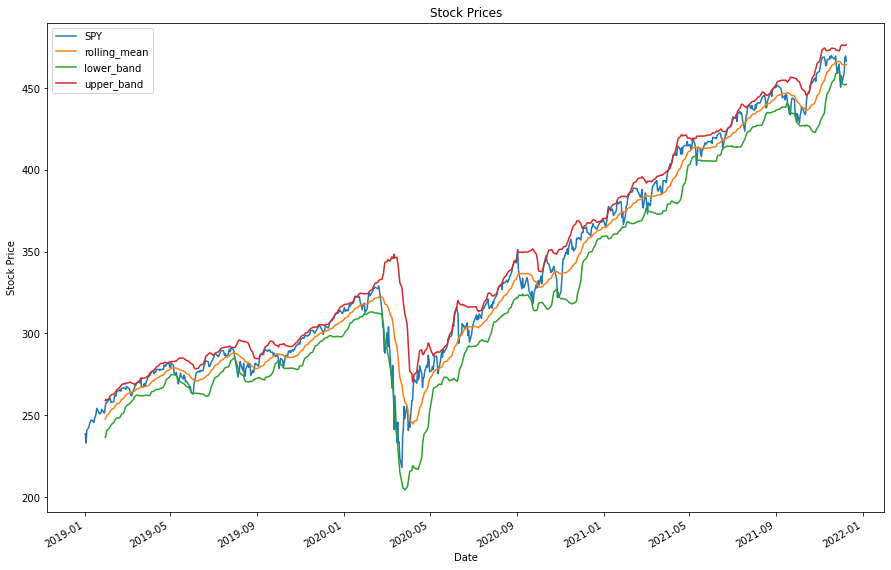

In [123]:
plot_data(spy_df[['SPY', 'rolling_mean', 'lower_band', 'upper_band']])

#### Daily Returns

In [140]:
spy_daily_df = tickers_df['Adj Close']

In [141]:
spy_daily_df.iloc[1:] = (spy_daily_df.iloc[1:] / spy_daily_df.iloc[:-1].values) - 1 

In [143]:
spy_daily_df.iloc[0,:] = 0

In [144]:
spy_daily_df.describe()

,GLD,GOOG,SPY,XOM
count,742.000000,742.000000,742.000000,742.000000
mean,0.000469,0.001579,0.001000,0.000371
std,0.009704,0.018695,0.013869,0.023169
min,-0.053694,-0.111008,-0.109424,-0.122248
25%,-0.004142,-0.006197,-0.003565,-0.010963
50%,0.000892,0.002033,0.001573,-0.000531
75%,0.005643,0.010070,0.007040,0.010767
max,0.048530,0.104485,0.090603,0.126868


<AxesSubplot:xlabel='Date'>

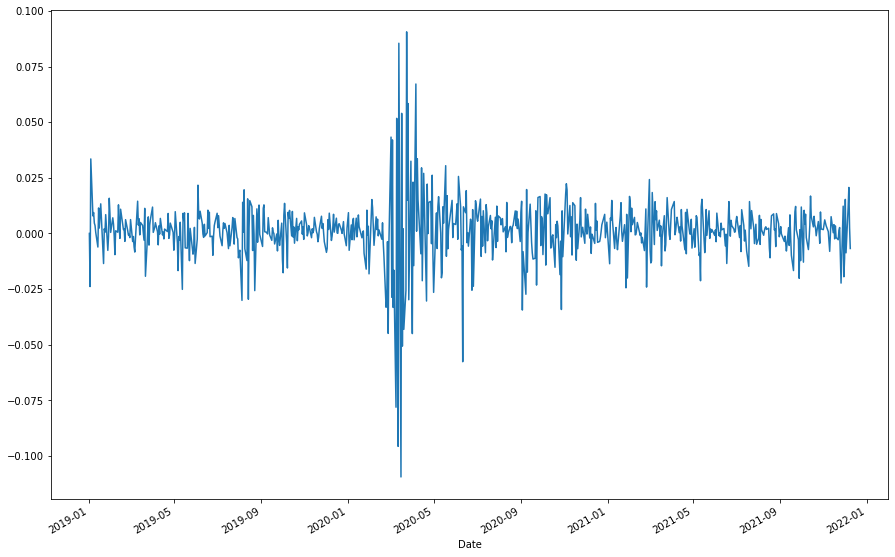

In [146]:
spy_daily_df['SPY'].plot()

In [150]:
daily_returns = tickers_df['Adj Close'][['SPY']]

In [151]:
daily_returns.head()

,SPY
Date,
2019-01-02,238.694489
2019-01-03,232.998596
2019-01-04,240.803101
2019-01-07,242.701721
2019-01-08,244.981979


In [154]:
daily_returns['daily_returns'] = (daily_returns / daily_returns.shift(1)) -1

In [156]:
daily_returns['daily_returns'].iloc[0,:] = 0

In [157]:
daily_returns.head()

,SPY,daily_returns
Date,,
2019-01-02,238.694489,0.000000
2019-01-03,232.998596,-0.023863
2019-01-04,240.803101,0.033496
2019-01-07,242.701721,0.007885
2019-01-08,244.981979,0.009395


<AxesSubplot:xlabel='Date'>

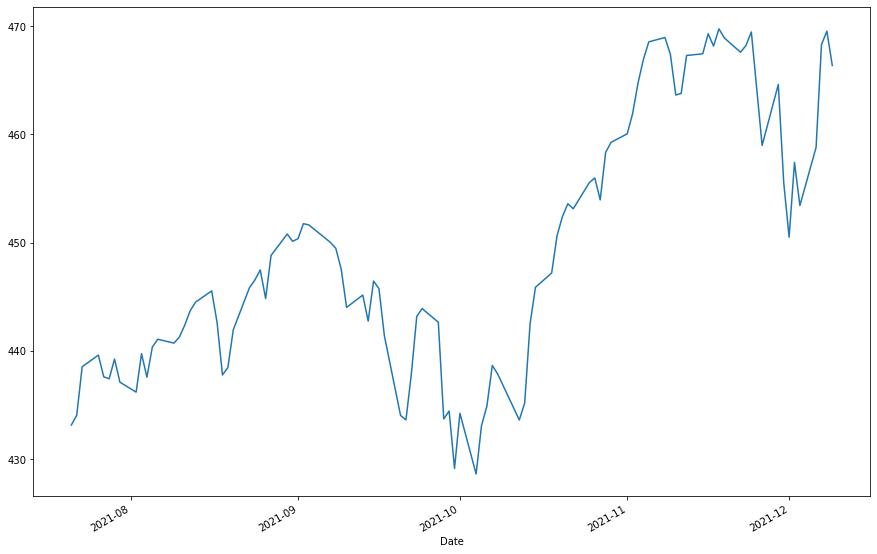

In [171]:
daily_returns['SPY'].tail(100).plot()

<AxesSubplot:xlabel='Date'>

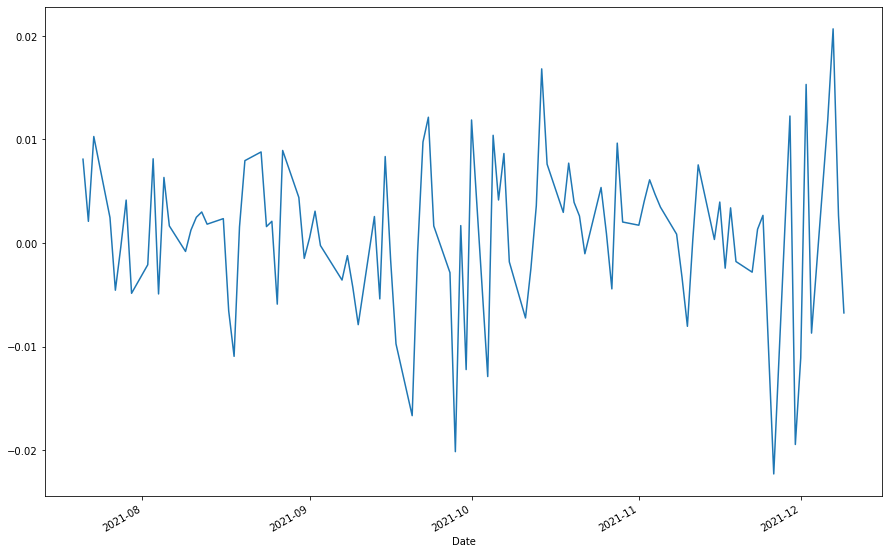

In [172]:
daily_returns['daily_returns'].tail(100).plot()

#### Cumulative Returns

In [180]:
cumm_returns = tickers_df['Adj Close'][['SPY']]

In [181]:
cumm_returns.head()

,SPY
Date,
2019-01-02,238.694489
2019-01-03,232.998596
2019-01-04,240.803101
2019-01-07,242.701721
2019-01-08,244.981979


In [182]:
cumm_returns['cumm_returns'] = (cumm_returns.iloc[1:] / cumm_returns.iloc[0,0]) - 1

In [184]:
cumm_returns.iloc[0,:] = 0

In [185]:
cumm_returns.head()

,SPY,cumm_returns
Date,,
2019-01-02,0.000000,0.000000
2019-01-03,232.998596,-0.023863
2019-01-04,240.803101,0.008834
2019-01-07,242.701721,0.016788
2019-01-08,244.981979,0.026341


<AxesSubplot:xlabel='Date'>

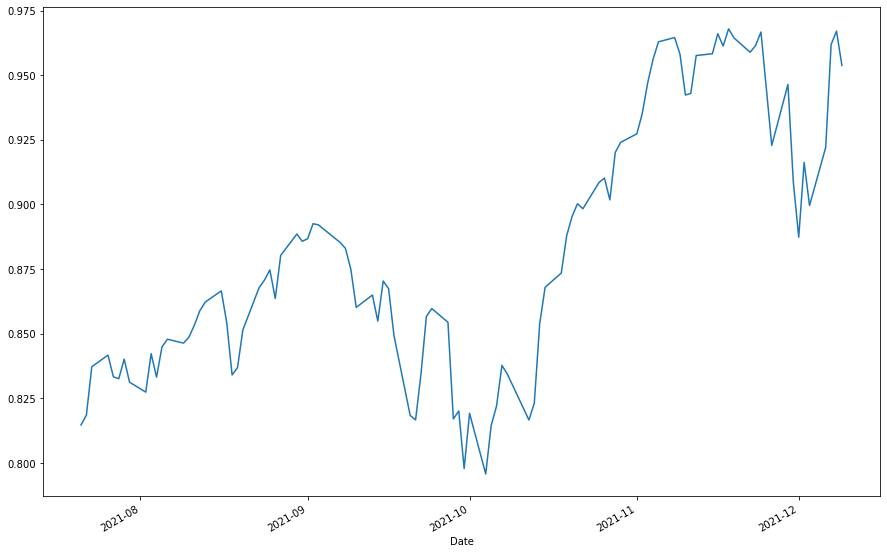

In [186]:
cumm_returns['cumm_returns'].tail(100).plot()

In [187]:
import sqlite3
import datetime as dt

In [189]:
db = sqlite3.connect('/Users/jegankarunakaran/AlgoTrading/code/AlgoTrading/db/ema_rsi_camarilla.db')
c = db.cursor()

In [193]:
#query data for the last X number of days from today. This is used to calculate Exponential Mean Average (EMA)
query_txn_sql = '''SELECT * from TRADE_TRANSACTION_BACKTEST'''
txn_df = pd.read_sql_query(query_txn_sql, db)
#print(result)

In [194]:
txn_df.head()

,transaction_id,strategy_name,ticker,tech_indicator,action,unit_price,quantity,total_price,status,time
0,1530,ema_rsi_camarilla,MSFT,"Tech Indicator: ema-224.53969392873626, rsi-1...",BUY,252.52,1,252.52,0,2021-04-29
1,1531,ema_rsi_camarilla,MSFT,"Tech Indicator: ema-224.80740841700754, rsi-7...",BUY,249.52,1,249.52,0,2021-04-30
2,1532,ema_rsi_camarilla,MSFT,"Tech Indicator: ema-230.64145224027436, rsi-9...",SELL,257.80,2,515.60,0,2021-06-11
3,1533,ema_rsi_camarilla,MSFT,"Tech Indicator: ema-243.6692960947574, rsi-14...",BUY,283.63,1,283.63,0,2021-08-02
4,1534,ema_rsi_camarilla,MSFT,"Tech Indicator: ema-245.78059156533564, rsi-8...",SELL,289.42,1,289.42,0,2021-08-09


In [195]:
txn_df.groupby('action')['total_price'].sum()

action
BUY     21357.88
SELL    19179.54
Name: total_price, dtype: float64

In [196]:
query_portfolio_sql = '''SELECT * from PORTFOLIO_BACKTEST'''
portfolio_df = pd.read_sql_query(query_portfolio_sql, db)

In [197]:
portfolio_df

,strategy_name,ticker,active_stocks,total_price,time
0,ema_rsi_camarilla,MSFT,0,-12.48,2021-10-07
1,ema_rsi_camarilla,TSLA,2,1938.29,2021-12-06
2,ema_rsi_camarilla,FB,0,-86.65,2021-10-19
3,ema_rsi_camarilla,NVDA,0,-74.63,2021-10-08
4,ema_rsi_camarilla,JPM,0,-34.19,2021-12-08
5,ema_rsi_camarilla,V,0,-16.05,2021-09-24
6,ema_rsi_camarilla,JNJ,2,336.26,2021-08-26
7,ema_rsi_camarilla,UNH,0,-60.11,2021-12-07
8,ema_rsi_camarilla,WMT,1,134.23,2021-11-30
9,ema_rsi_camarilla,BAC,2,79.17,2021-12-01


In [200]:
portfolio_df[portfolio_df['active_stocks'] == 0]['ticker']

0     MSFT
2       FB
3     NVDA
4      JPM
5        V
7      UNH
10      PG
11    CASH
Name: ticker, dtype: object

In [204]:
txn_df[txn_df['ticker'] == 'MSFT'].groupby('action')['total_price'].sum()

action
BUY     1383.20
SELL    1395.68
Name: total_price, dtype: float64

In [206]:
1395.68-1383.2

12.480000000000018